# Stack Overflow Developer Survey 2017

## North American Web Developers in Comparison with Asian country developers.

By: Bhavesh Jakhar

## Business Understanding :

In this project I have used the dataset from Stack Overflow survey data 2017.


Project goal is to find out:

1 Which Location has the highest Job satisfaction and Career Satisfaction ?

2 Who spends highest time seaching for a job throughout the week ?

3 One who has coded for long time with coding as part of their job?

4 Relation between Career satisfaction and Job satisfaction?


## Data Understanding:

1 First Import necessary libraries.

2 We wrangle the data for the needful information. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# 'df_1' signifies dataframe

df_1 = pd.read_csv("survey_results_public_first.csv")
df_1.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_1.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


### Wrangling the Data of our need: 

1 Only useful data to be selected

2 Removing unnecessary data.

3 YearsCoded is vital.

4 Filling the missing value.


In [ ]:
# selecting required features:

In [9]:
columns = ['Respondent','Country','WebDeveloperType', 'YearsCodedJob', 'HoursPerWeek', 'JobSatisfaction' ,'CareerSatisfaction', 'Salary', 'WorkStart']

# Let's make sure Professional developers and full-time employed are included in the data.

data = df_1[df_1['Professional']=='Professional developer']
data = data[data['EmploymentStatus']=='Employed full-time']
data = data[data['WorkStart'].notnull()]
data = data[data['CareerSatisfaction'].notnull()]
data = data[columns]

In [10]:
data.head()

,Respondent,Country,WebDeveloperType,YearsCodedJob,HoursPerWeek,JobSatisfaction,CareerSatisfaction,Salary,WorkStart
2,3,United Kingdom,NaN,20 or more years,NaN,9.0,8.0,113750.0,9:00 AM
7,8,Poland,Full stack Web developer,7 to 8 years,1.0,7.0,7.0,NaN,Noon
8,9,Colombia,NaN,7 to 8 years,2.0,6.0,6.0,NaN,9:00 AM
13,14,Germany,Full stack Web developer,15 to 16 years,3.0,6.0,8.0,NaN,10:00 AM
14,15,United Kingdom,NaN,20 or more years,NaN,8.0,8.0,100000.0,9:00 AM


In [11]:
# Now converting into the two regions:
North_America = ['United States', 'Canada']

Asia = ['China', 'India','Indonesia', 'Pakistan','Bangladesh','Japan', 'Philippines', 'Vietnam','Turkey', 'Thailand',
        'South Korea', 'Malaysia','North Korea', 'Sri Lanka', 'United Arab Emirates', 'Nepal', 'Yemen','Jordan']

data['Location'] = data['Country'].apply(lambda x: 'Asia' if x in Asia else ('North_America' if x in North_America else 'Other'))
data.head()

,Respondent,Country,WebDeveloperType,YearsCodedJob,HoursPerWeek,JobSatisfaction,CareerSatisfaction,Salary,WorkStart,Location
2,3,United Kingdom,NaN,20 or more years,NaN,9.0,8.0,113750.0,9:00 AM,Other
7,8,Poland,Full stack Web developer,7 to 8 years,1.0,7.0,7.0,NaN,Noon,Other
8,9,Colombia,NaN,7 to 8 years,2.0,6.0,6.0,NaN,9:00 AM,Other
13,14,Germany,Full stack Web developer,15 to 16 years,3.0,6.0,8.0,NaN,10:00 AM,Other
14,15,United Kingdom,NaN,20 or more years,NaN,8.0,8.0,100000.0,9:00 AM,Other


Everything is sorted now: data of only two regions - Asia and North America

Now Analysing the information we need

##  Which Location has the highest Job satisfaction and Career Satisfaction ?

Now search for which location has the highest job satisfaction and career satisfaction.

Tranforming data using melt CareerJobSati.

In [13]:
# creating a new dataframe with Location , CareerSatisfaction and JobSatisfaction. Also the null values from the three features are dropped.
CareerJobSati = data[['Location','CareerSatisfaction','JobSatisfaction']].dropna(axis=0, how='any')

In [15]:
# Now we are transforming the dataframe CareerJobSati by keeping the Location intact.


CareerJobSatiMelt = CareerJobSati.melt(id_vars=['Location'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


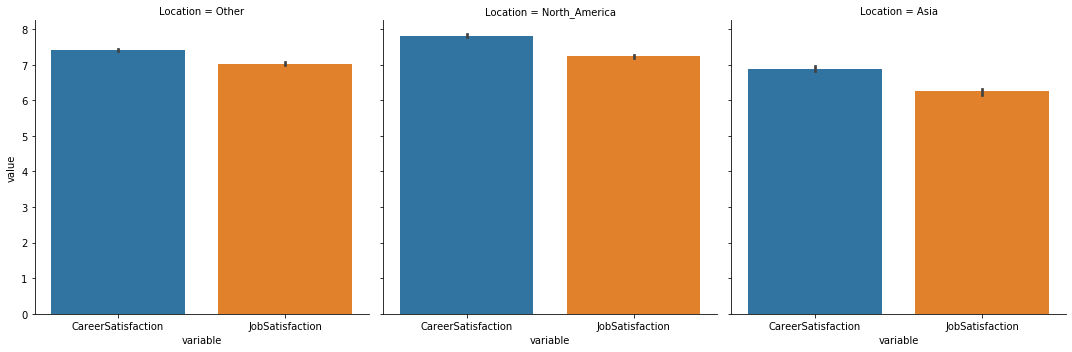

In [18]:

#Factorplot are used to plot categorical values.
#Now are loading the tranformed DataFrame CareerJobSati to give a factorplot with kind mentioned as bar plot.
sns.factorplot(x='variable', y = 'value', data=CareerJobSatiMelt, col='Location' ,kind='bar')

 conclusion that North America has the highest Job Satisfaction and Career Satisfaction.

##  Who spends highest time searching for a job throughout the week ? 

In [19]:
Time = data[['Location', 'HoursPerWeek']].dropna(axis=0, how='any')
Time.groupby(['Location'])['HoursPerWeek'].mean()

Location
Asia             5.404487
North_America    2.254412
Other            2.473005
Name: HoursPerWeek, dtype: float64

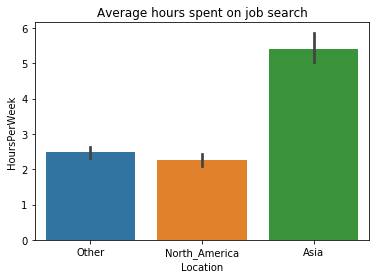

In [21]:
sns.barplot(x = 'Location', y = 'HoursPerWeek', data = Time)
plt.title('Average hours spent on job search');

Its clearly visible that Web Developers in Asia have spent more time in searching for a job throughout the week.

## One who has coded for long time with coding as part of their job? 

Now mapping the years of coding experience in their job to numerical values to handle the easily.

In [22]:
# Now we'll creating a function to map the values in exp to a numerical value for ease of reading and plotting.

def NumExp(column):
    # exp is a dictionary containing the experience as key and it's numerical value as values.
    exp = {
    'Less than a year': 0,
    '1 to 2 years': 1,
    '2 to 3 years': 2,
    '3 to 4 years': 3,
    '4 to 5 years': 4,
    '6 to 7 years': 6, 
    '7 to 8 years': 7,
    '8 to 9 years': 8,
    '9 to 10 years': 9,
    '10 to 11 years': 10,
    '11 to 12 years': 11,
    '12 to 13 years': 12,
    '13 to 14 years': 13,
    '14 to 15 years': 14,
    '15 to 16 years': 15,
    '16 to 17 years': 16,
    '17 to 18 years': 17,
    '18 to 19 years': 18,
    '19 to 20 years': 19,
    '20 or more years': 20
    }
    # This maps the categorical values in YearsCodedJob to their respective keys mentioned in the above dictionary. 
    exp_code = data[['Location', column]].dropna(axis=0, how='any')
    exp_code[column] = exp_code[column].map(exp)
    
    return exp_code

In [23]:

#  function NumExp is used to map YearsCodedJob and the DataFrame is being stored in CodingExp.
CodingExp = NumExp('YearsCodedJob')
exp_plot = CodingExp.groupby(['Location'])['YearsCodedJob'].mean().reset_index()

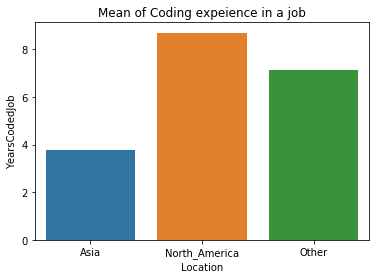

In [24]:
# DataFrame exp_plot is used to plot a barplot to derive the insights.
sns.barplot(x = 'Location', y = 'YearsCodedJob', data = exp_plot)
plt.title('Mean of Coding expeience in a job');

 America-North has the highest Web Developers who have spent most of their job in coding.

## Relation between Career satisfaction and Job satisfaction? 

Now see how Career Satisfaction and Job Satisfaction are correlated.

In [30]:
# Now this gives a correlation coefficient. A number close to one means strong positive correlation.
CareerJobSati.JobSatisfaction.corr(df_1.CareerSatisfaction)

0.6194173477073717

its manifest, now we observe a strong postive correlation between Career Satisfaction and Job Satisfaction

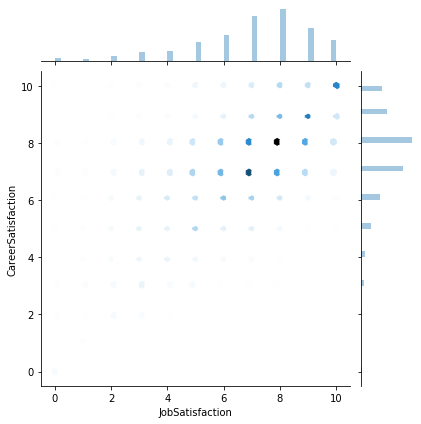

In [32]:
#Now plotting a joint plot between Job Satisfaction and Career Satisfaction. 
#The plot kind is hexagonal.
sns.jointplot(x='JobSatisfaction', y='CareerSatisfaction', data=CareerJobSati, kind='hex')

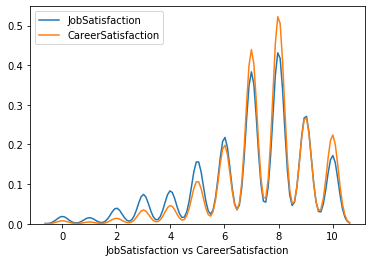

In [33]:
# Distplot plots a univariate distribution of observations.
#Now using distplot to visually show the positive correlation between Job Satisfaction and Career Satisfaction.
sns.distplot(CareerJobSati.JobSatisfaction,hist=False, label='JobSatisfaction')
sns.distplot(CareerJobSati.CareerSatisfaction,hist=False, label='CareerSatisfaction', \
             axlabel='JobSatisfaction vs CareerSatisfaction')
plt.show()

Its manifested that when Job Satisfaction rises Career Satisfaction also rises. Hence visually proving that they are positively correlated.

# Conclusions:

1 North America has the highest Job Satisfaction and Career Satisfaction.

2 Web Developers in Asia have spent more time in searching for a job throughout the week.

3 America-North has the highest Web Developers who have spent most of their job in coding.

4 When Job Satisfaction rises Career Satisfaction also rises. Hence visually proving that they are positively correlated.